In [7]:
# UCI Breast Cancer Dataset - Logistic Regression

## 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

print("Libraries imported successfully.")


Libraries imported successfully.


In [8]:
## 2. Load Preprocessed Data

print("Loading preprocessed data...")

X_train = pd.read_csv('data/processed/X_train_scaled.csv')
y_train = pd.read_csv('data/processed/y_train.csv')
X_test = pd.read_csv('data/processed/X_test_scaled.csv')
y_test = pd.read_csv('data/processed/y_test.csv')

# Convert to numpy arrays (same style as SVM notebook)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print("✓ Data loaded successfully!")
print("\nDataset Information:")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Testing samples : {X_test.shape[0]}")
print(f"  Number of features: {X_train.shape[1]}")

print("\nClass Distribution:")
print(f"  Training - Benign: {np.sum(y_train == 0)}, Malignant: {np.sum(y_train == 1)}")
print(f"  Testing  - Benign: {np.sum(y_test == 0)}, Malignant: {np.sum(y_test == 1)}")


Loading preprocessed data...
✓ Data loaded successfully!

Dataset Information:
  Training samples: 455
  Testing samples : 114
  Number of features: 30

Class Distribution:
  Training - Benign: 285, Malignant: 170
  Testing  - Benign: 72, Malignant: 42


In [9]:
## 3. Define and Train Logistic Regression Model

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    solver="lbfgs",
    random_state=42
)

print("\nTraining Logistic Regression model...")
log_reg.fit(X_train, y_train)
print("✓ Training completed.")



Training Logistic Regression model...
✓ Training completed.


In [10]:
## 4. Evaluate Model Performance

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("\n=== Logistic Regression Performance on Test Set ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["benign", "malignant"]))



=== Logistic Regression Performance on Test Set ===
Accuracy : 0.9737
Precision: 0.9756
Recall   : 0.9524
F1 score : 0.9639
ROC AUC  : 0.9954

Confusion Matrix:
[[71  1]
 [ 2 40]]

Classification Report:
              precision    recall  f1-score   support

      benign       0.97      0.99      0.98        72
   malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



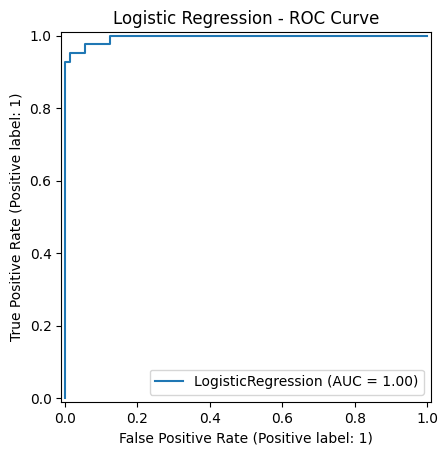

In [11]:
## 5. ROC Curve

RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.show()


In [12]:
## 6. Save Model and Metadata

os.makedirs('models', exist_ok=True)

model_filename = 'models/logistic_regression_breast_cancer_model.pkl'
joblib.dump(log_reg, model_filename)

metadata = {
    'model_type': 'Logistic Regression',
    'class_weight': log_reg.class_weight,
    'solver': log_reg.solver,
    'C': log_reg.C,
    'accuracy': float(accuracy),
    'precision': float(precision),
    'recall': float(recall),
    'f1_score': float(f1),
    'roc_auc': float(roc_auc),
    'train_samples': int(X_train.shape[0]),
    'test_samples': int(X_test.shape[0]),
    'n_features': int(X_train.shape[1])
}

metadata_filename = 'models/logistic_regression_metadata.pkl'
joblib.dump(metadata, metadata_filename)

print("\n" + "="*60)
print("LOGISTIC REGRESSION MODEL SAVED SUCCESSFULLY")
print("="*60)
print(f"✓ Model saved to: {model_filename}")
print(f"✓ Metadata saved to: {metadata_filename}")
print("\nModel Summary:")
for key, value in metadata.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")



LOGISTIC REGRESSION MODEL SAVED SUCCESSFULLY
✓ Model saved to: models/logistic_regression_breast_cancer_model.pkl
✓ Metadata saved to: models/logistic_regression_metadata.pkl

Model Summary:
  model_type: Logistic Regression
  class_weight: balanced
  solver: lbfgs
  C: 1.0000
  accuracy: 0.9737
  precision: 0.9756
  recall: 0.9524
  f1_score: 0.9639
  roc_auc: 0.9954
  train_samples: 455
  test_samples: 114
  n_features: 30
